## Script for Dating Website

# Dating Website


<li>Each user has to fill an extensive questionaries to define ``dimensions of personality''.


<li>Based on these dimensions, the webpage <font color="red">estimates compatibility scores</font> associated to each possible couple.


<li>How can we match pairs to <font color="red">maximize global compatibility</font>?

<li> Let index $i$ represent women and $j$ represent men. Let $w_{ij}$ be the compatibility score between woman $i$ and man $j$.


 <li> <font color="blue">Decision variables:</font>

$$
x_{ij}=
\left\{\begin{array}{ll} 
1, & \text{if we match user $i$ and user $j$,}\\
0, & \text{if we do not match user  $i$ and user $j$}
\end{array} \right.\quad i=1,2,3 \quad j=1,2,3
$$

 <li> <font color="blue">Data:</font>  
  
$w_{ij}$ | $i=1$ | $i=2$ | $i=3$
 -------|---------------------
  $j=1$ | 1 | 3 | 5 
  $j=2$ | 4 | 2 | 2 
  $j=3$ | 1 | 5 | 3
  

<li><font color="blue">Formulation:</font>

\begin{align*}
\underset{x_{ij}}{\max} & \quad \sum_{i=1}^{n}\sum_{j=1}^{n}w_{ij}x_{ij}\\
\text{s.t.:}&\\
  &\sum_{i=1}^{n} x_{ij} =1 \quad \forall j\\
  &\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i\\
  &x_{ij} \in \{0,1\} \quad \forall ij 
\end{align*}








In [1]:
import numpy as np

n=3   #Women
m=3   #men

w = np.array( [ [1,4,1], [3,2,5], [5,2,3] ] )
w


array([[1, 4, 1],
       [3, 2, 5],
       [5, 2, 3]])

In [2]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

opt = SolverFactory("glpk")

model = AbstractModel()

model.I = RangeSet(1,n)
model.J = RangeSet(1,m)

model.x = Var(model.I, model.J, domain=Binary)

# Objective Function
def obj_function(model):
    return sum ( sum( model.x[i,j] * w[i-1, j-1] for i in model.I) for j in model.J)

model.OBJ = Objective(rule = obj_function, sense = maximize)


# Constraints

def const1(model, j):
    return sum(model.x[i,j] for i in model.I) == 1

model.cons1 = Constraint(model.J, rule = const1)


def const2(model, i):
    return sum(model.x[i,j] for j in model.J) == 1

model.cons2 = Constraint(model.I, rule = const2)




In [3]:

instance = model.create_instance()

results = opt.solve(instance)

print results
print (instance.OBJ() )

a = instance.x[1,2].value
print(a)



Problem: 
- Name: unknown
  Lower bound: 14.0
  Upper bound: 14.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 10
  Number of nonzeros: 19
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.0057201385498
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

14.0
1.0


In [5]:

OF_vec = np.zeros(10)
for cont in range (0,10):
    w = np.random.uniform(0, 10, ([n,m]))
    instance = model.create_instance()
    opt.solve(instance)
    OF_vec[cont] = instance.OBJ()
    
print OF_vec
    

[ 18.97262492  20.23990852  22.8255385   20.68459105  20.10084881
  22.02309304  21.2811031   20.21831598  12.66099844  18.97981469]


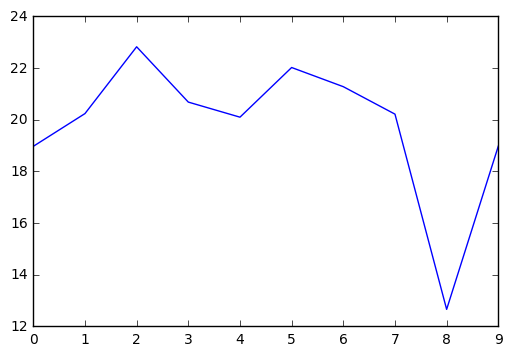

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(OF_vec)
